<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_8/Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn

Uploaded files to colab before execution (Uploaded in "framework" folder in github)

In [18]:
from model import BasicBlock, ResNet  
from datatransform import DataTransformation
from dataloader import Loader
from train import Train
from test import Test
import helper

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
transform = DataTransformation()
#Different transforms for training and testing in this assignment
trainTransform = transform.ResNet18TrainTransform()
testTransform = transform.ResNet18TestTransform()

loader = Loader(trainTransform, testTransform)
#Going with the default variable values set in the data loader
trainloader, testloader, classes = loader.CIFAR10Load()

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat  bird truck  bird


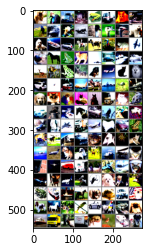

In [21]:
# Show random training images (default 4)
helper.DisplayImages(trainloader, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat  ship  ship plane


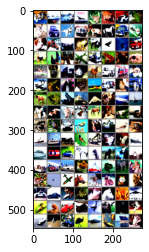

In [22]:
# Show random testing images (default 4)
helper.DisplayImages(testloader, classes)

In [23]:
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)
model = torch.nn.DataParallel(model)
cudnn.benchmark = True

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [25]:
#Display model summary
helper.DisplayModelSummary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [26]:
epochs = 25

In [27]:
#Training
Train(trainloader, model, criterion, optimizer, scheduler, device, epochs).train()

[1,   391] loss: 499.436
[2,   391] loss: 292.080
[3,   391] loss: 206.620
[4,   391] loss: 148.711
[5,   391] loss: 104.797
[6,   391] loss: 67.464
[7,   391] loss: 49.314
[8,   391] loss: 36.598
[9,   391] loss: 25.149
[10,   391] loss: 17.383
[11,   391] loss: 12.457
[12,   391] loss: 10.206
[13,   391] loss: 5.247
[14,   391] loss: 1.792
[15,   391] loss: 0.453
[16,   391] loss: 0.277
[17,   391] loss: 0.261
[18,   391] loss: 0.243
[19,   391] loss: 0.239
[20,   391] loss: 0.246
[21,   391] loss: 0.253
[22,   391] loss: 0.274
[23,   391] loss: 0.270
[24,   391] loss: 0.285
[25,   391] loss: 0.288


In [28]:
#Testing
Test(testloader, model, criterion, device).test()

Accuracy of the network on the 10000 test images: 85 %


In [29]:
helper.DisplayClassAccuracy(model, testloader, classes, device)

Accuracy of plane : 86 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 64 %
Accuracy of  deer : 92 %
Accuracy of   dog : 78 %
Accuracy of  frog : 86 %
Accuracy of horse : 84 %
Accuracy of  ship : 96 %
Accuracy of truck : 92 %
